합성곱 신경망의 시각화

가중치 시각화

1.필터의 가중치가 높은 영역: 특성맵에 높은 출력값

2.필터의 가중치가 낮은 영역: 특성맵에 낮은 출력값

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.load_model('best-cnn-model.h5')

층의 가중치 분포

In [ ]:
model.layers
#studying_19에서 학습한 데이터
#입력데이터도 많고.. 시간이 오래걸려서 파일값을 가져오기로 했음
#8개의 객체

In [ ]:
conv = model.layers[0]
#첫번째 Conv2D객체의 가중치
print(conv.weights[0].shape, conv.weights[1].shape)
#필터(가중치)와 필터의 개수(절편)
#3X3X1크기(3차원) + 32개 => 필터

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()
#필터(가중치)시각화

print(conv_weights.mean(), conv_weights.std())

-0.010689763 0.24276347


In [ ]:
import matplotlib.pyplot as plt

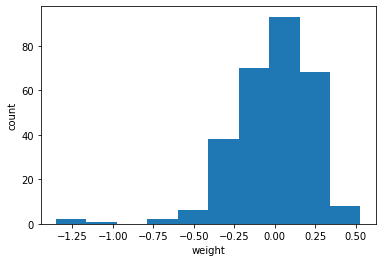

In [ ]:
plt.hist(conv_weights.reshape(-1, 1))#3X3X1X32
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
#0에 가까운값: 의미있는것을 학습하는 가중치 X
#0에 먼값은 입력데이터에서 의미가 있는 부분
#이는 훈련된 모델이기 때문에 가중치의 범위값이 넓은 것으로 알 수 있다.

층의 가중치 시각화 3x3x1 32개

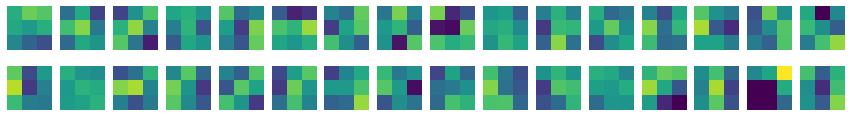

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        #최대값: 0.5(밝음) 최소값: -0.5(어두움)
        axs[i, j].axis('off')

plt.show()
#1번째 필터의 경우 첫 가로줄이 높은 가중치로 이루어져 있는것을 보아
#유의미한 결과를 검출하기 위한 것으로 볼수 있다. 

In [ ]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.00076825224 0.08380037


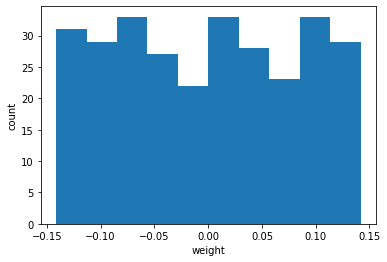

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
#훈련되지 않은 모델의 경우의 가중치 필터값 => 균등

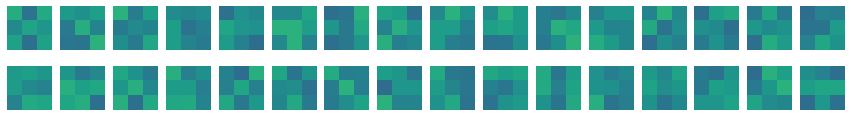

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()
#32개의 필터의 가중치들이 균등하다잇~!

함수형 API

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
conv_acti = keras.models.Model(model.input, model.layers[0].output)
#함수형 API
#첫 번째 특성 맵 시각화
#model.layers[0] = Conv2D

특성 맵 시각화

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


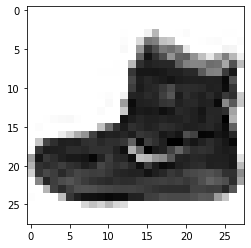

In [ ]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()
#첫번째는 신발

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
#정규화
feature_maps = conv_acti.predict(inputs)

In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


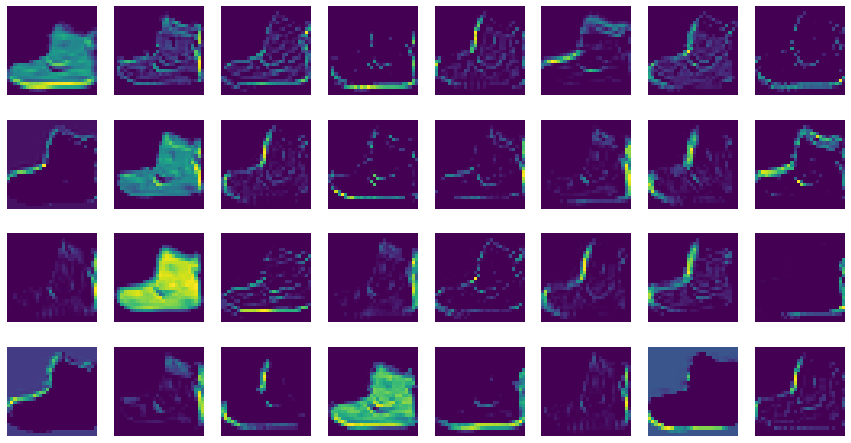

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

두 번째 특성 맵 시각화

In [ ]:
conv2_acti = keras.models.Model(model.input, model.layers[2].output)
#2번째 합성곱 층
#maxpooling층을 한번 지났음 Con2D 층

In [ ]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)
#정규화

In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


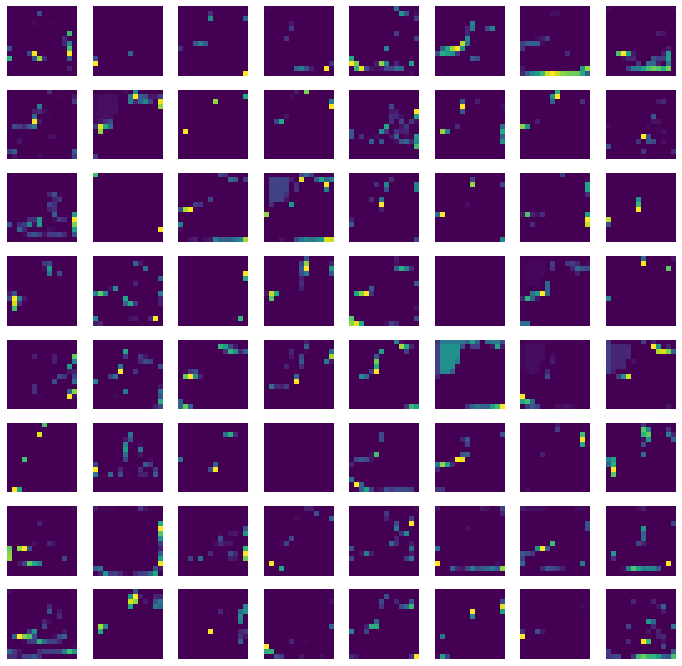

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()
#층이 갚어질수록 난해하고 여렵다

대부분 sequential 모델 -> 케라스모델설정

경우에따라 복잡한 작업은 함수형 API를 통해서 함